In [2]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

init_notebook()

from colors import *

In [3]:
import pandas as pd

In [4]:
df_wal = pd.read_csv('../../data/kyoto.msync.csv', header=None, index_col=0)
df_cxlbuf = pd.read_csv('../../data/kyoto.cxlbuf.csv', header=None, index_col=0)

In [5]:
df_wal

,1,2,3,4,5,6
0,,,,,,
1.000,2.276,2.289,2.279,2.273,2.285,2.321
0.500,2.030,2.062,1.978,2.050,2.027,2.005
0.250,2.666,2.654,2.687,2.627,2.804,2.783
0.125,4.265,4.266,4.131,4.204,4.198,4.191
0.062,4.359,4.364,4.339,4.270,4.289,4.367
0.031,3.961,3.923,4.010,3.963,3.941,3.913
0.015,3.437,3.444,3.462,3.451,3.440,3.417
0.007,2.803,2.809,2.886,2.863,2.733,2.922


In [6]:
df_cxlbuf

,1,2,3,4,5,6
0,,,,,,
1.000,2.002,1.998,2.001,2.011,1.997,2.002
0.500,1.496,1.495,1.509,1.495,1.518,1.498
0.250,1.117,1.130,1.117,1.120,1.130,1.120
0.125,0.848,0.864,0.858,0.858,0.859,0.857
0.062,0.690,0.696,0.678,0.689,0.689,0.683
0.031,0.573,0.575,0.568,0.577,0.568,0.579
0.015,0.506,0.500,0.500,0.500,0.503,0.505
0.007,0.436,0.430,0.430,0.433,0.440,0.445


In [7]:
df_mean = pd.DataFrame()
df_mean['msync'] = df_wal.mean(axis=1)
df_mean['Snapshot'] = df_cxlbuf.mean(axis=1)
df_mean_orig = df_mean.copy(deep=True)
df_mean.index = ["%.0f" % val for val in 1/df_mean.index]

In [8]:
df_mean

,msync,Snapshot
1,2.287167,2.001833
2,2.025333,1.501833
4,2.703500,1.122333
8,4.209167,0.857333
16,4.331333,0.687500
32,3.951833,0.573333
67,3.441833,0.502333
143,2.836000,0.435667


In [9]:
df_mean_orig

,msync,Snapshot
0,,
1.000,2.287167,2.001833
0.500,2.025333,1.501833
0.250,2.703500,1.122333
0.125,4.209167,0.857333
0.062,4.331333,0.687500
0.031,3.951833,0.573333
0.015,3.441833,0.502333
0.007,2.836000,0.435667


In [13]:

figsize = (7,2)
fontsize = 14
Fig.config(fontsize, figsize)

          WAL  Snapshot
1    2.287167  2.001833
2    2.025333  1.501833
4    2.703500  1.122333
8    4.209167  0.857333
16   4.331333  0.687500
32   3.951833  0.573333
67   3.441833  0.502333
143  2.836000  0.435667


Plot saved as `plots/pathfinding/kyoto-tx.png`

Plot saved as `plots/pathfinding/kyoto-tx.png`

Using pdfcrop on `plots/pathfinding/kyoto-tx.png` with command `pdfcrop plots/pathfinding/kyoto-tx.pdf plots/pathfinding/kyoto-tx.pdf`

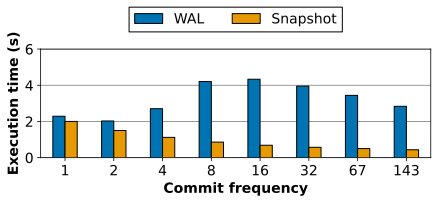

In [17]:
df_mean = rename_cols(df_mean, {'msync': 'WAL', 'Snapy': 'Snapshot'})
print(df_mean)
ax = df_mean.plot.bar(**Fig.get_kwargs())
f = Fig(ax)
ax.grid(axis='y', zorder=0, color='gray')
f.fmt_label("Commit frequency", "Execution time (s)")
f.xrot(rot=0)
f.fmt_legend(fontsize=fontsize)
ax.set_yticks(np.arange(0,6.1,2))
save_fig('kyoto-tx')